## 터키 1분기 실적 예측하기

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
import matplotlib as matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

### 데이터 불러오기

1. 박스오피스모조 사이트에서 데이터테이블 불러오기

In [112]:
import requests as requests
from bs4 import BeautifulSoup

url = "https://www.boxofficemojo.com/year/?area=TR"
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('table')

rows = table.find_all('tr')
data = []
for row in rows[1:] : # 첫 행이 비어있으므로
    row_data = row.find_all("td")
    row = [cell.text for cell in row_data]
    data.append(row)

headers = table.find_all('th')
column_names = [header.text for header in headers]

df = pd.DataFrame(data)
df.columns = column_names

print(df)


    Year   Total Gross    %± LY Releases     Average  \
0   2023   $33,097,324        -      115    $287,802   
1   2022   $71,851,732  +314.8%      286    $251,229   
2   2021   $17,323,833     -54%       67    $258,564   
3   2020   $37,670,024   -76.3%      152    $247,829   
4   2019  $158,828,872   -12.1%      437    $363,452   
5   2018  $180,649,098   -19.3%      462    $391,015   
6   2017  $223,902,914    +5.4%      424    $528,072   
7   2016  $212,337,060    +1.9%      404    $525,586   
8   2015  $208,444,598   -18.7%      324    $643,347   
9   2014  $256,469,748    +3.1%      297    $863,534   
10  2013  $248,676,065      -4%      346    $718,716   
11  2012  $258,927,238   +11.6%      345    $750,513   
12  2011  $232,006,061   -41.4%      338    $686,408   
13  2010  $395,780,391    +109%      312  $1,268,526   
14  2009  $189,412,970     -17%      312    $607,092   
15  2008  $228,144,925   +24.7%      326    $699,831   
16  2007  $182,979,491   +20.4%      301    $607

2. 데이터 테이블 전처리 하기

In [113]:
df["Total Gross"] = df["Total Gross"].str.replace('$' ,"").str.replace(',', "")
df["Average"] = df["Average"].str.replace('$' ,"").str.replace(',', "")

df["Average"] = df["Average"].astype(int)
df["Year"] = pd.to_datetime(df["Year"], format = "%Y")

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_37092\925385101.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Total Gross"] = df["Total Gross"].str.replace('$' ,"").str.replace(',', "")
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_37092\925385101.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average"] = df["Average"].str.replace('$' ,"").str.replace(',', "")


In [114]:
df["Total Gross"] = df["Total Gross"].astype(int)

In [115]:
# 인덱스를 연도로 바꾸기
df = df.set_index('Year')

In [116]:
df = df.sort_values(by = "Year")

In [117]:
print(df)

            Total Gross    %± LY Releases  Average  \
Year                                                 
2002-01-01     25222960        -       80   315287   
2003-01-01     73120979  +189.9%      136   537654   
2004-01-01    115774333   +58.3%      132   877078   
2005-01-01    125434781    +8.3%      138   908947   
2006-01-01    151932513   +21.1%      172   883328   
2007-01-01    182979491   +20.4%      301   607905   
2008-01-01    228144925   +24.7%      326   699831   
2009-01-01    189412970     -17%      312   607092   
2010-01-01    395780391    +109%      312  1268526   
2011-01-01    232006061   -41.4%      338   686408   
2012-01-01    258927238   +11.6%      345   750513   
2013-01-01    248676065      -4%      346   718716   
2014-01-01    256469748    +3.1%      297   863534   
2015-01-01    208444598   -18.7%      324   643347   
2016-01-01    212337060    +1.9%      404   525586   
2017-01-01    223902914    +5.4%      424   528072   
2018-01-01    180649098   -1

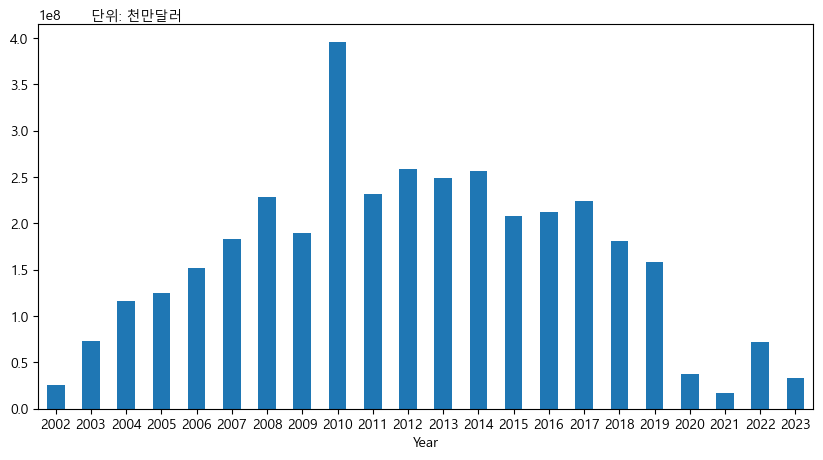

In [122]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize= (10, 5))
ax = df['Total Gross'].plot(kind='bar')

# Customize the y-axis tick labels
y_formatter = ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)

# Add a description of the y-axis units
plt.text(1, ax.get_ylim()[1], '단위: 천만달러', va='bottom')

# Customize the x-axis tick labels
plt.xticks(range(len(df)), df.index.year, rotation = 0)

plt.show()

### CGV 실적 

In [123]:
import os
import requests
from bs4 import BeautifulSoup

url = 'https://m.irgo.co.kr/IR-COMP/079160/CJ%20CGV-IR-PAGE'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all the links to the PDF files
links = soup.select('a[href$=".pdf"]')

# Create a directory to store the downloaded files
os.makedirs('downloads', exist_ok=True)

# Download each PDF file
for link in links:
    pdf_url = link['href']
    filename = os.path.basename(pdf_url)
    response = requests.get(pdf_url)
    with open(os.path.join('downloads', filename), 'wb') as f:
        f.write(response.content)

In [127]:
import os
import requests
from bs4 import BeautifulSoup

base_url = 'https://m.irgo.co.kr'
start_url = base_url + '/IR-COMP/079160/CJ%20CGV-IR-PAGE'
response = requests.get(start_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all the links to the pages with the PDF files
links = soup.select('a[href*="/IR-COMP/079160/"]')

# Create a directory to store the downloaded files
os.makedirs('downloads', exist_ok=True)

# Follow each link and download the PDF file
for link in links:
    page_url = base_url + link['href']
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    pdf_link = soup.select_one('a[href$=".pdf"]')
    if pdf_link:
        pdf_url = pdf_link['href']
        filename = os.path.basename(pdf_url)
        response = requests.get(pdf_url)
        with open(os.path.join('downloads', filename), 'wb') as f:
            f.write(response.content)

In [ ]:
#tab2 > div > div:nth-child(1) > ul > li:nth-child(1)

#tab2 > div > div:nth-child(1) > ul > li:nth-child(2)

#tab2 > div > div:nth-child(1) > ul > li:nth-child(14)

In [132]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://m.irgo.co.kr'
start_url = base_url + '/IR-COMP/079160/CJ%20CGV-IR-PAGE'
response = requests.get(start_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the link to the other page using the CSS selector
link = soup.select_one('#tab2 > div > div:nth-child(1) > ul > li:nth-child(1) a')
if link:
    page_url = base_url + link['href']
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Now you can access the content of the other page using the `soup` object

pdf_link = soup.select_one('a[href$=".pdf"]')
if pdf_link:
    pdf_url = pdf_link['href']
    filename = os.path.basename(pdf_url)
    response = requests.get(pdf_url)
    with open(os.path.join('downloads', filename), 'wb') as f:
        f.write(response.content)

In [136]:
print(response)

<Response [200]>
